Code von der Blog Seite: 
    http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import pandas as pd
import time
import datetime
%matplotlib inline

def dateparse (ts_str):    
    return datetime.datetime.strptime(ts_str, '%Y%m%d_%H:%M:%S')

df = pd.read_csv('data/LU_dat/VSP_86303/all_together.csv.gz', compression='gzip', index_col='timestamp', parse_dates=True, date_parser=dateparse)

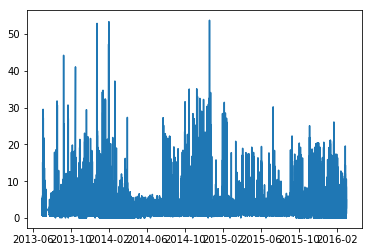

In [2]:
dataset = df[df['PQ_SVCT'] < 15000]['PQ_SVCT']
plt.plot(dataset)
plt.show()

In [80]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, LSTM, Dropout, BatchNormalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)

look_back = 40
batch_size = 32
train_ratio = 0.7

In [5]:
# load the dataset
dataframe = dataset = df[df['PQ_SVCT'] < 15000]['PQ_SVCT']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [6]:
# cut dataframe
# 175104
factor = int((len(dataset) * train_ratio - look_back) / batch_size)
print(factor * batch_size)
dataset = dataset[:250208,]

184928


In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [8]:
# split into train and test sets
train_size = int(len(dataset) * train_ratio)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

175145 75063


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#train

In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(175104, 1, 40)

In [12]:
# create and fit the LSTM network
#print(len(train))
model = Sequential()
model.add(LSTM(batch_size,
               input_shape=(1, look_back),
               batch_size=batch_size,
               return_sequences=True,
               stateful=True))
model.add(LSTM(batch_size,
               return_sequences=False,
               stateful=True))
#model.add(Dense(1))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 1, 32)               9344      
_________________________________________________________________
lstm_2 (LSTM)                (32, 32)                  8320      
_________________________________________________________________
batch_normalization_1 (Batch (32, 32)                  128       
_________________________________________________________________
dropout_1 (Dropout)          (32, 32)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   33        
Total params: 17,825.0
Trainable params: 17,761.0
Non-trainable params: 64.0
_________________________________________________________________


In [73]:
model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=2)

Epoch 1/100
42s - loss: 4.6709e-04
Epoch 2/100
44s - loss: 4.7012e-04
Epoch 3/100
46s - loss: 4.6702e-04
Epoch 4/100
44s - loss: 4.6892e-04
Epoch 5/100
47s - loss: 4.6303e-04
Epoch 6/100
47s - loss: 4.6610e-04
Epoch 7/100
46s - loss: 4.6140e-04
Epoch 8/100
47s - loss: 4.5861e-04
Epoch 9/100
45s - loss: 4.5876e-04
Epoch 10/100
47s - loss: 4.5934e-04
Epoch 11/100
46s - loss: 4.6253e-04
Epoch 12/100
44s - loss: 4.6637e-04
Epoch 13/100
47s - loss: 4.5966e-04
Epoch 14/100
43s - loss: 4.6233e-04
Epoch 15/100
43s - loss: 4.5912e-04
Epoch 16/100
43s - loss: 4.5359e-04
Epoch 17/100
42s - loss: 4.6226e-04
Epoch 18/100
42s - loss: 4.5897e-04
Epoch 19/100
48s - loss: 4.6019e-04
Epoch 20/100
50s - loss: 4.5910e-04
Epoch 21/100
46s - loss: 4.5500e-04
Epoch 22/100
48s - loss: 4.5657e-04
Epoch 23/100
50s - loss: 4.5586e-04
Epoch 24/100
46s - loss: 4.5235e-04
Epoch 25/100
42s - loss: 4.5607e-04
Epoch 26/100
42s - loss: 4.5176e-04
Epoch 27/100
41s - loss: 4.5269e-04
Epoch 28/100
42s - loss: 4.5326e-04
E

In [75]:
trainY.shape

(175104,)

In [76]:
# make predictions
trainPredict = model.predict(trainX[:174976,:,:])
testPredict = model.predict(testX[:75008,:,:])
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
invTrainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
invTestY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(invTrainY[0][:174976], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(invTestY[0][:75008], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.08 RMSE
Test Score: 1.13 RMSE


/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


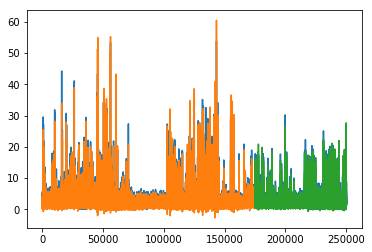

In [77]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = np.reshape(trainPredict, len(trainPredict))
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1+142:len(dataset)-1] = np.reshape(testPredict, len(testPredict))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


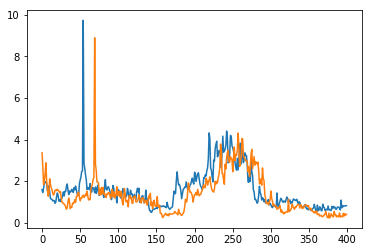

In [78]:
plt.plot(scaler.inverse_transform(dataset)[200000:200400])
plt.plot(testPredictPlot[200000:200400])

In [82]:
model.save('LB128.h5')

In [153]:
model = load_model('LB128.h5')
def generate_sample(start_index = 200000, count=400):
    generated = []
    diversity = 0.1
    maxlen = 32 * look_back
    sentence = testPredictPlot[start_index: start_index + maxlen]
    generated = np.append(generated, sentence)
    
    for i in range(count):
        preds = (model.predict(sentence.reshape(32,1,look_back), verbose=0))[0,-1]
        generated = np.append(generated, preds)
        sentence = np.append(sentence[1:], preds)
    
    #print(generated.shape)
    return generated

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(1400,)


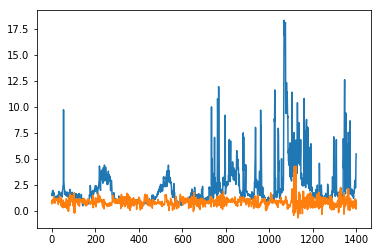

In [160]:
pred_start  = 32 * look_back
start_index = 235000 - pred_start
count       = 2500
plt.plot(scaler.inverse_transform(dataset)[start_index + pred_start:start_index + pred_start + count])
samples = generate_sample(start_index, count)[pred_start:]
print(samples.shape)
plt.plot(samples)
plt.show()